# Converting ADC data to FFT and numpy array (Baby absent - testing)

## ADC data is converted to fft and normalised and converted to numpy array as it is easier for handling large datas

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import fftpack
import matplotlib.pyplot as plt

absent_dir = '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/'

# Fetch all the files for baby absent data which will be used for training

file_paths_absent = []

all_files = os.listdir(absent_dir)    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
for i in csv_files:
    file_path = absent_dir + i
    file_paths_absent.append(file_path)
file_paths_absent

['/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/BabyWithoutSeat_11.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/adc_no_2000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/BabyWithoutSeat_12.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/adc_7.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/adc_13.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/adc_12.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/adc_6.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/adc_1.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/adc_29.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/adc_no_20000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/adc_no_8000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_test/CarriageWithoutB

In [2]:
# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file paths and append each DataFrame to the list
for file in file_paths_absent:
    df = pd.read_csv(file, header=None, index_col=False)
    dfs.append(df)

# Concatenate all the DataFrames in the list
combined_df_absent = pd.concat(dfs, ignore_index=True)
train_absent_len = len(combined_df_absent)
print(train_absent_len)
combined_df_absent

20205


,0,1,2,3,4,5,6,7,8,9,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20201,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20202,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20203,64,32768,1,1,512,0,1953125,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f"Length of combined data frame: {len(combined_df_absent)}")

# Get the shape of the DataFrame
shape = combined_df_absent.shape

# Number of rows
num_rows = shape[0]

# Number of columns
num_columns = shape[1]

# Print the number of rows and columns
print("Number of rows baby absent:", num_rows)
print("Number of columns baby absent:", num_columns)

Length of combined data frame: 20205
Number of rows baby absent: 20205
Number of columns baby absent: 16400


In [4]:
# Skip header data and consider only adc data for fft calculation
adc_data_selected_absent = combined_df_absent.iloc[:, 16:].mean(axis=1)
adc_data_selected_absent

0       -152.896444
1       -152.913245
2       -151.054252
3       -153.162023
4       -159.081806
            ...    
20200   -156.257698
20201   -155.960655
20202   -150.887708
20203   -162.396017
20204   -156.483932
Length: 20205, dtype: float64

In [5]:
# Convert the pandas Series to a numpy array
adc_array = adc_data_selected_absent.to_numpy() 

# Hanning window is chosen
window = np.hanning(len(adc_array))

# Apply the window function to your data
windowed_adc_data = adc_array * window

# Perform FFT on the windowed data
fft_result = np.fft.fft(windowed_adc_data)

sampling_rate = 16000
n = len(adc_array)
freq = np.fft.fftfreq(n, d=1/sampling_rate)
# Calculate the magnitude and phase of the FFT result
magnitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Create a DataFrame
fft_df = pd.DataFrame({
    'Frequency': freq,
    'FFT Magnitude': magnitude,
    'Phase': phase
})


fft_df

,Frequency,FFT Magnitude,Phase
0,0.000000,1.342401e+06,-3.141593
1,0.791883,7.927805e+05,0.057536
2,1.583766,2.113120e+05,2.933800
3,2.375650,2.855225e+04,-2.176552
4,3.167533,1.772091e+05,-0.400568
...,...,...,...
20200,-3.959416,7.536623e+03,0.738284
20201,-3.167533,1.772091e+05,0.400568
20202,-2.375650,2.855225e+04,2.176552
20203,-1.583766,2.113120e+05,-2.933800


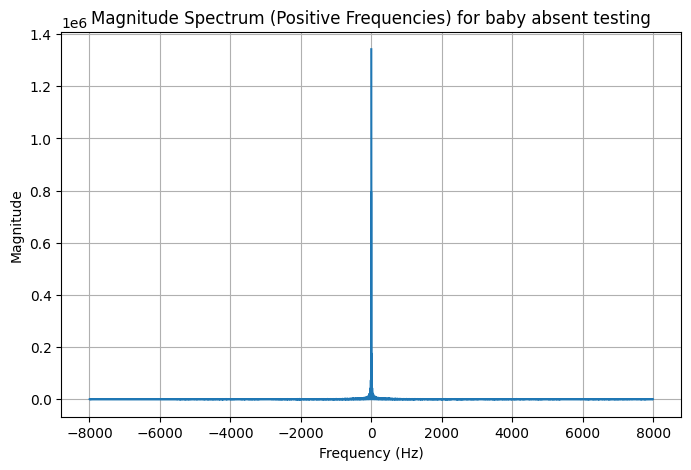

In [6]:
plt.figure(figsize=(8, 5))  # Set the figure size for better readability
plt.plot(fft_df['Frequency'], fft_df['FFT Magnitude'])  # Plot positive frequency vs magnitude
plt.title('Magnitude Spectrum (Positive Frequencies) for baby absent testing')  # Title of the plot
plt.xlabel('Frequency (Hz)')  # Label for the x-axis
plt.ylabel('Magnitude')  # Label for the y-axis
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot

## Store the data calculated

In [7]:
numpy_array = fft_df.to_numpy()
print(os.getcwd())
# Save the array to a file
np.save((absent_dir+'withoutbaby_test.npy'), numpy_array)

/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/code
